In [6]:
import sys
!{sys.executable} -m ensurepip --upgrade
!{sys.executable} -m pip install seaborn


Looking in links: c:\Users\DELL\AppData\Local\Temp\tmpvvchjvg_
     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ------ ------------------------------ 51.2/294.9 kB 890.4 kB/s eta 0:00:01
     --------------- ---------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------- ----- 256.0/294.9 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [8]:
df = pd.read_csv("data/raw_air_quality_data.csv")

print(df.shape)
df.head()


(61622, 19)


,stationId,stationName,getTime,CO,Hướng gió,Lượng mưa,NO,NO2,NOx,Nhiệt độ,O3,PM-10,PM-2-5,RH,SO2,TVOC,Tốc độ gió,Áp suất khí quyển,Độ ẩm
0,28915732959631398237539556920,Hà Nội: Khu vực Lăng Bác (KK),2026-02-03T09:00:00,NaN,124.7345,NaN,4.7627,0.0582,7.8473,15.3636,NaN,NaN,NaN,NaN,42.1255,NaN,1.4864,1022.7827,79.4509
1,28915732959631398237539556920,Hà Nội: Khu vực Lăng Bác (KK),2026-02-03T08:00:00,NaN,55.1783,NaN,5.0333,0.1873,7.6092,15.0208,NaN,NaN,NaN,NaN,43.1875,NaN,1.3742,1022.2783,86.5708
2,28915732959631398237539556920,Hà Nội: Khu vực Lăng Bác (KK),2026-02-03T07:00:00,NaN,154.1658,NaN,4.8708,0.2838,8.0342,14.8100,NaN,NaN,NaN,NaN,43.0317,NaN,1.2742,1021.5650,92.8925
3,28915732959631398237539556920,Hà Nội: Khu vực Lăng Bác (KK),2026-02-03T06:00:00,NaN,260.2442,NaN,4.6208,0.1173,7.7767,14.5358,NaN,NaN,NaN,NaN,42.7425,NaN,1.1192,1021.0508,92.1783
4,28915732959631398237539556920,Hà Nội: Khu vực Lăng Bác (KK),2026-02-03T05:00:00,NaN,320.6425,NaN,4.8625,0.0258,7.9458,14.5858,NaN,NaN,NaN,NaN,42.9483,NaN,0.9950,1020.7725,91.5867


In [9]:
df["getTime"] = pd.to_datetime(df["getTime"])
df = df.sort_values("getTime")

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61622 entries, 33821 to 0
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   stationId          61622 non-null  object        
 1   stationName        61622 non-null  object        
 2   getTime            61622 non-null  datetime64[ns]
 3   CO                 2631 non-null   float64       
 4   Hướng gió          2160 non-null   float64       
 5   Lượng mưa          1236 non-null   float64       
 6   NO                 2160 non-null   float64       
 7   NO2                6005 non-null   float64       
 8   NOx                3920 non-null   float64       
 9   Nhiệt độ           55285 non-null  float64       
 10  O3                 5571 non-null   float64       
 11  PM-10              6125 non-null   float64       
 12  PM-2-5             58394 non-null  float64       
 13  RH                 53125 non-null  float64       
 14  SO2        

In [10]:
sensor_cols = [c for c in df.columns if c not in ["stationId", "stationName", "getTime"]]
sensor_cols


['CO',
 'Hướng gió',
 'Lượng mưa',
 'NO',
 'NO2',
 'NOx',
 'Nhiệt độ',
 'O3',
 'PM-10',
 'PM-2-5',
 'RH',
 'SO2',
 'TVOC',
 'Tốc độ gió',
 'Áp suất khí quyển',
 'Độ ẩm']

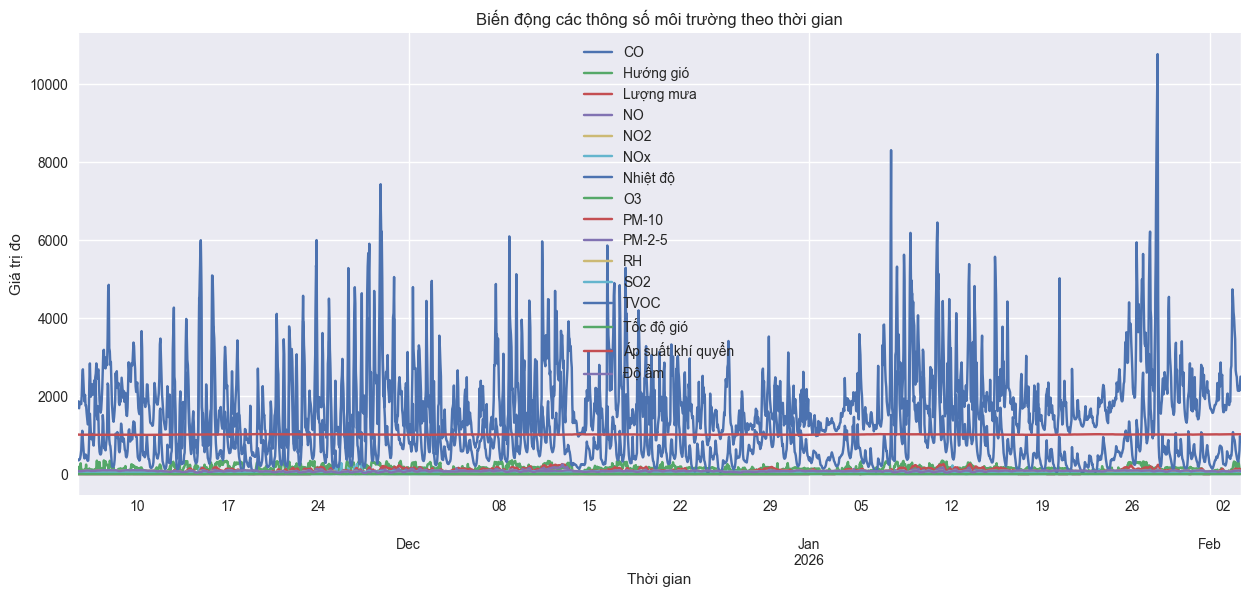

In [12]:
data_time = df.groupby("getTime")[sensor_cols].mean()

data_time.plot(figsize=(15,6))
plt.title("Biến động các thông số môi trường theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Giá trị đo")
plt.show()


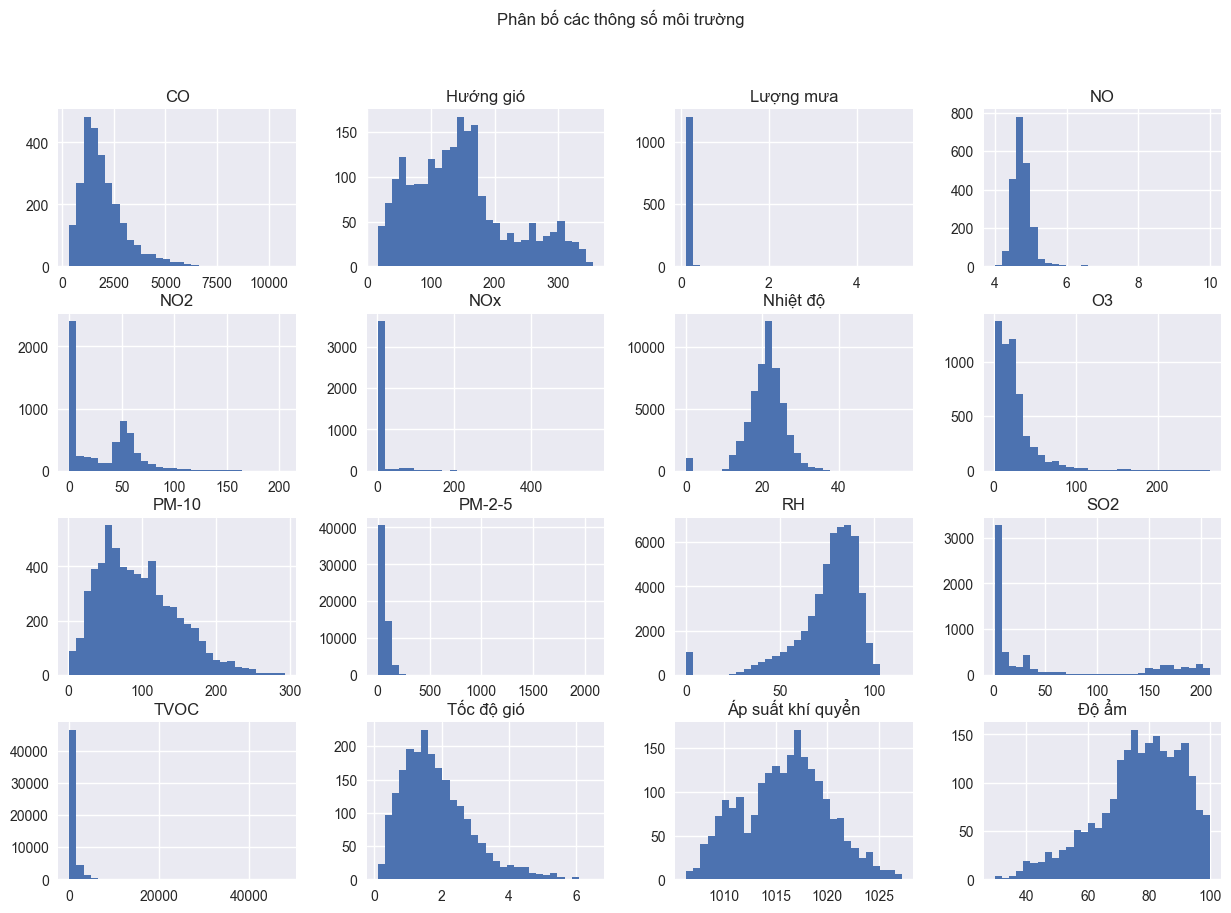

In [13]:
df[sensor_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Phân bố các thông số môi trường")
plt.show()


In [22]:
df["PM-2-5"] = pd.to_numeric(df["PM-2-5"], errors="coerce")


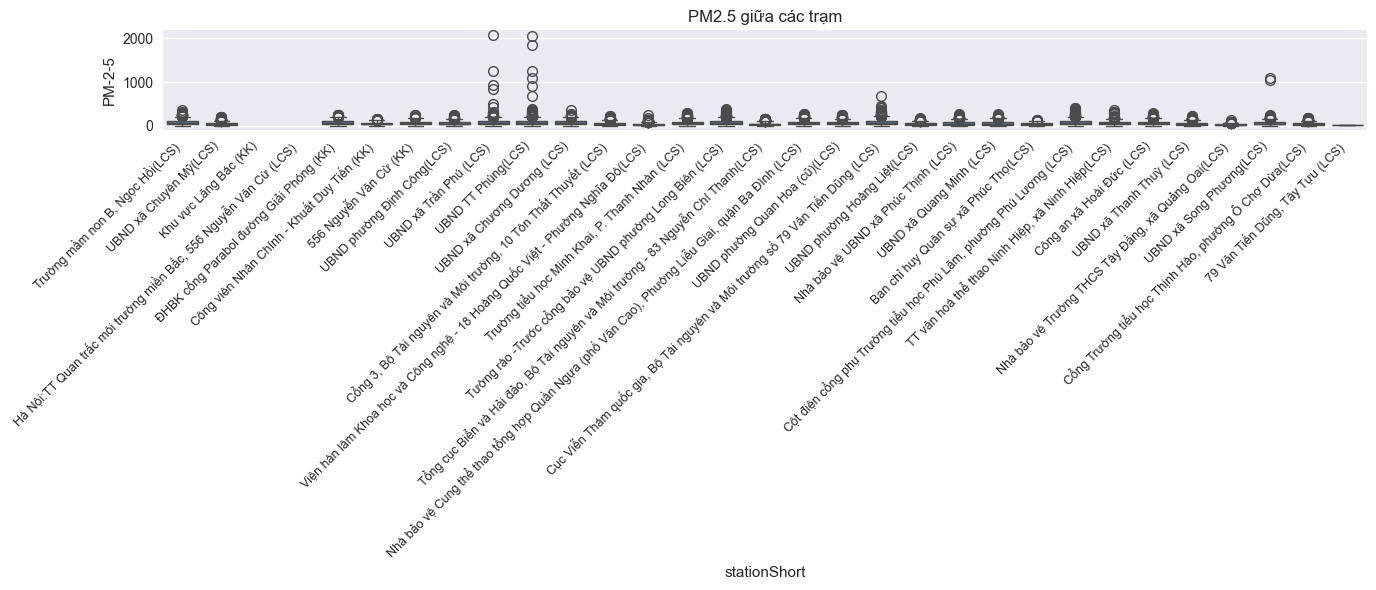

In [27]:
df["stationShort"] = df["stationName"].str.replace("Hà Nội: ", "", regex=False)

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="stationShort", y="PM-2-5")

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.title("PM2.5 giữa các trạm")
plt.tight_layout()
plt.show()


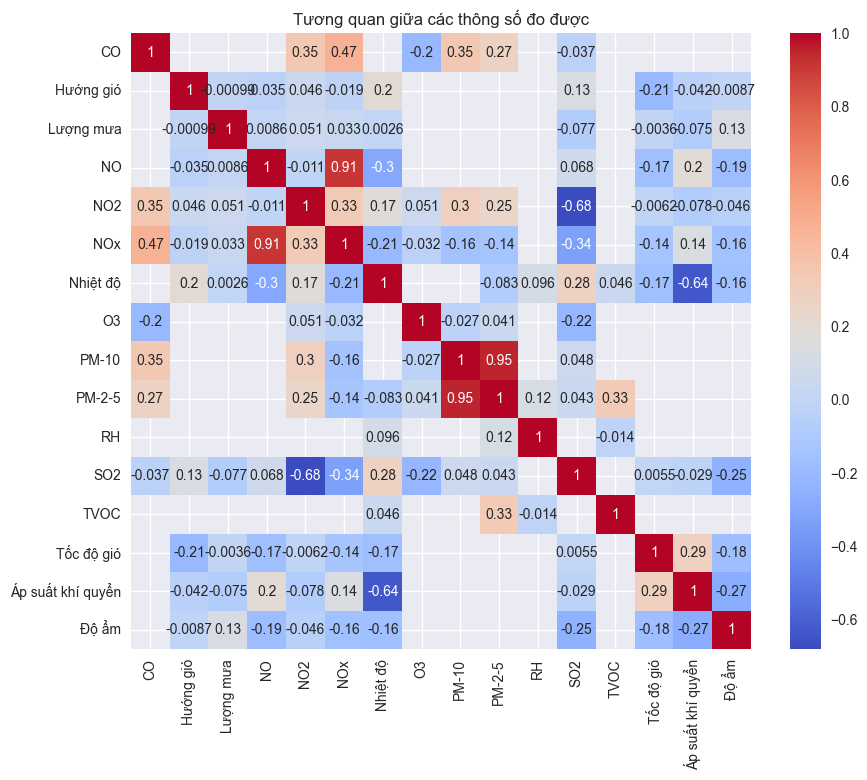

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[sensor_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Tương quan giữa các thông số đo được")
plt.show()


In [ ]:
PHẦN DƯỚI LÀ LẤY CHO SLIDE

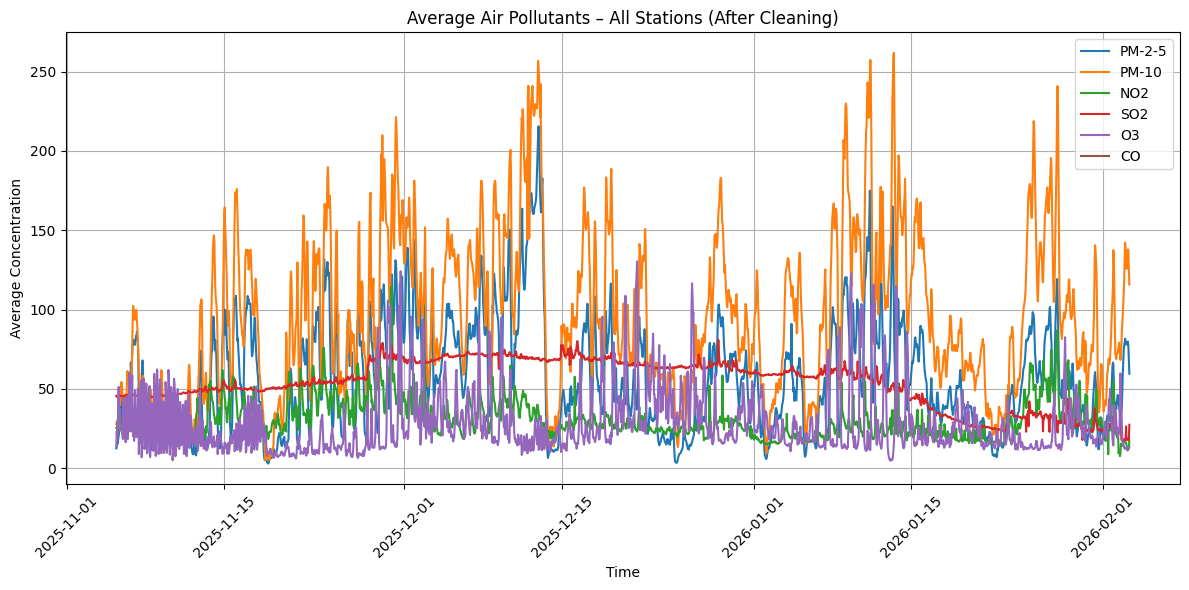

In [21]:
plt.figure(figsize=(12, 6))

for p in pollutants:
    if p in df_city.columns:
        plt.plot(df_city["getTime"], df_city[p], label=p)

plt.xlabel("Time")
plt.ylabel("Average Concentration")
plt.title("Average Air Pollutants – All Stations (After Cleaning)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


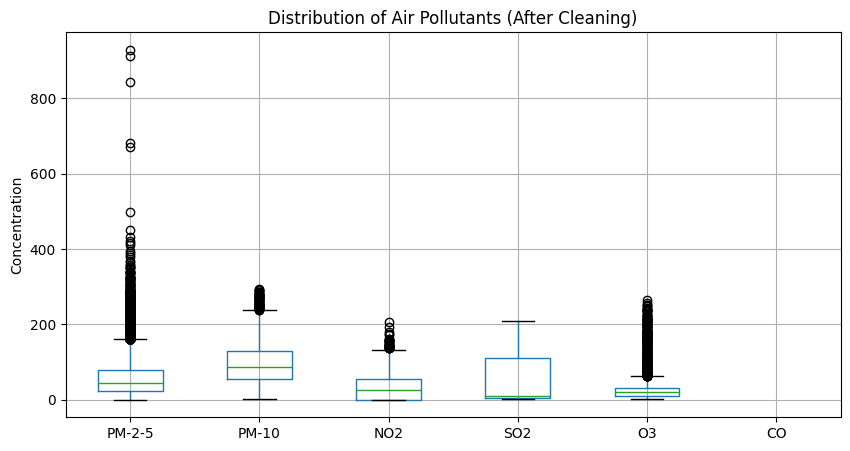

In [22]:
plt.figure(figsize=(10, 5))
df[pollutants].boxplot()
plt.title("Distribution of Air Pollutants (After Cleaning)")
plt.ylabel("Concentration")
plt.grid(True)
plt.show()


VISUALIZE SAU KHI TÍNH AQI

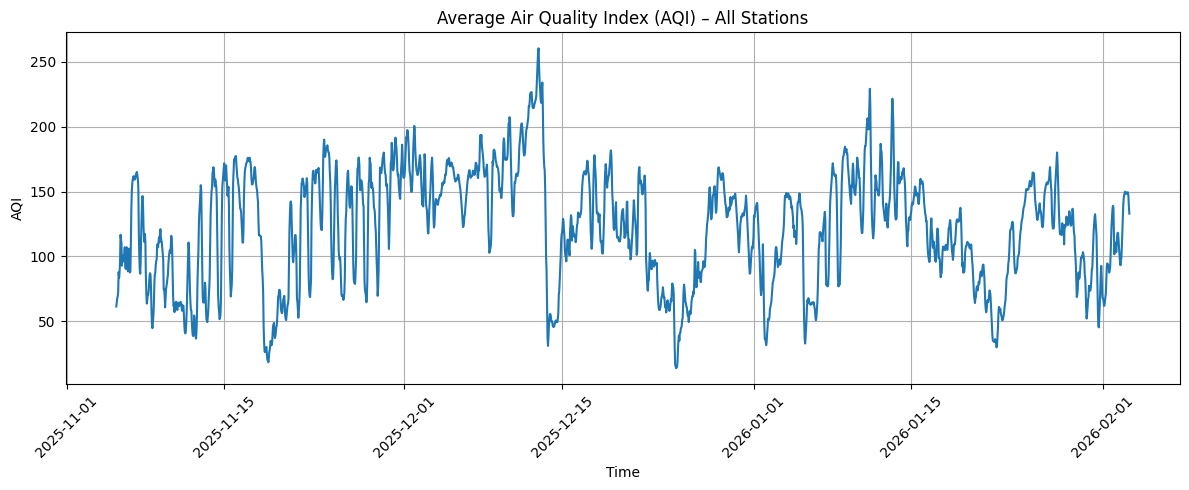

In [26]:
plt.figure(figsize=(12, 5))

plt.plot(df_city["getTime"], df_city["AQI"])

plt.xlabel("Time")
plt.ylabel("AQI")
plt.title("Average Air Quality Index (AQI) – All Stations")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


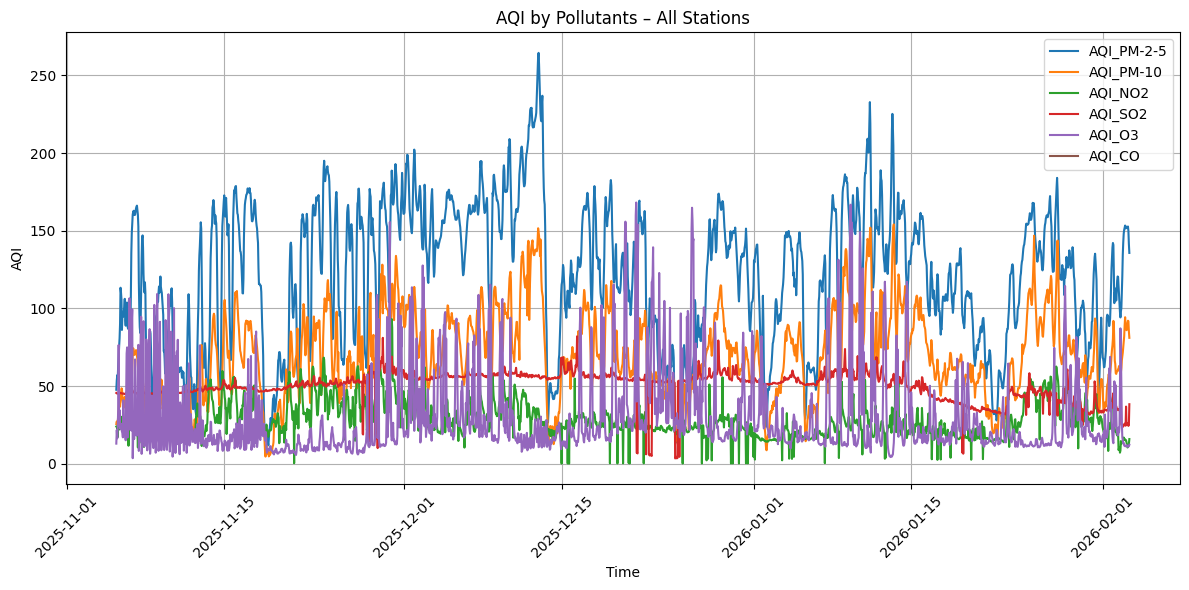

In [30]:
aqi_pollutants = [
    "AQI_PM-2-5",
    "AQI_PM-10",
    "AQI_NO2",
    "AQI_SO2",
    "AQI_O3",
    "AQI_CO"
]

plt.figure(figsize=(12, 6))

for col in aqi_pollutants:
    if col in df_city.columns:
        plt.plot(df_city["getTime"], df_city[col], label=col)

plt.xlabel("Time")
plt.ylabel("AQI")
plt.title("AQI by Pollutants – All Stations")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


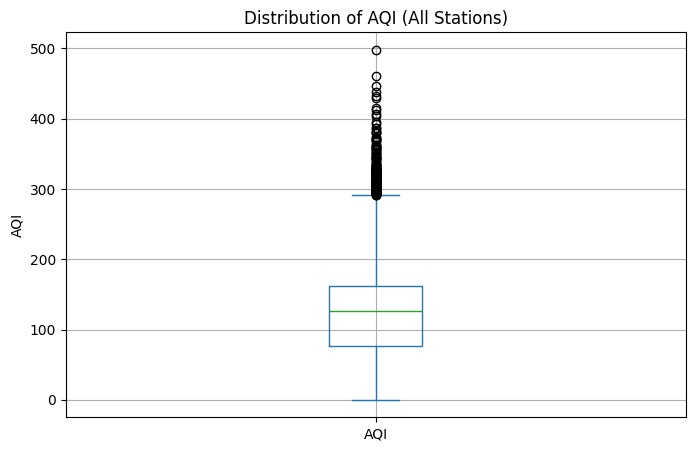

In [29]:
plt.figure(figsize=(8, 5))
df["AQI"].dropna().plot(kind="box")
plt.title("Distribution of AQI (All Stations)")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


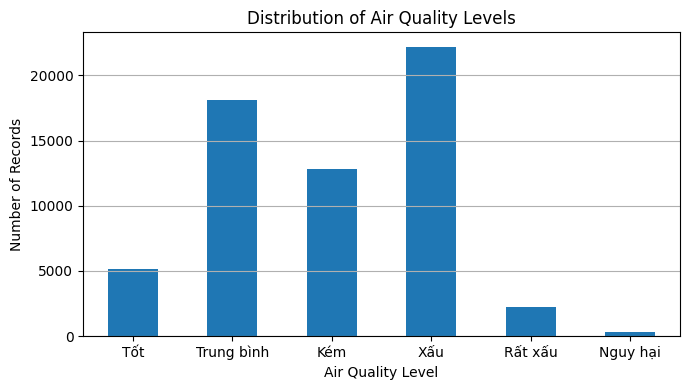

In [32]:
import matplotlib.pyplot as plt

# Thứ tự AQI mong muốn
aqi_order = ["Tốt", "Trung bình", "Kém", "Xấu", "Rất xấu", "Nguy hại"]

# Đếm theo thứ tự đã định nghĩa
level_counts = df["Level"].value_counts().reindex(aqi_order)

plt.figure(figsize=(7, 4))
level_counts.plot(kind="bar")

plt.xlabel("Air Quality Level")
plt.ylabel("Number of Records")
plt.title("Distribution of Air Quality Levels")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


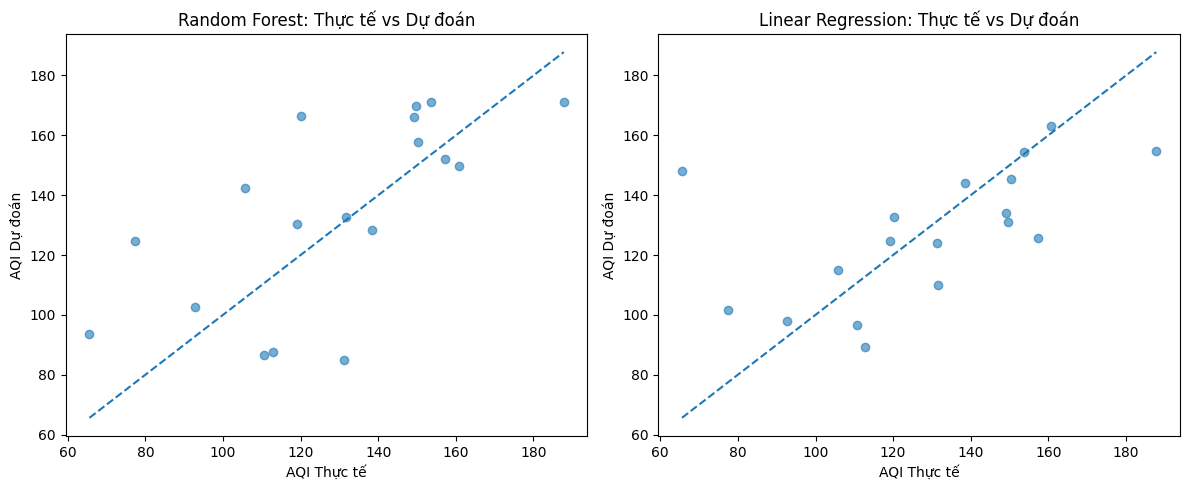

In [42]:
plt.figure(figsize=(12, 5))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("AQI Thực tế")
plt.ylabel("AQI Dự đoán")
plt.title("Random Forest: Thực tế vs Dự đoán")

# Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("AQI Thực tế")
plt.ylabel("AQI Dự đoán")
plt.title("Linear Regression: Thực tế vs Dự đoán")

plt.tight_layout()
plt.show()
